In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the data from the CSV file
df = pd.read_csv('/content/sample_data/stock_price_data_OCT_22_to_Oct_223.csv')

In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Change the date format to YYYY-MM-DD
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [ ]:
df.head()

,Date,Symbol,High,Low,Close,Volume
0,2023-10-24,NVDA,436.97,426.91,436.63,40044400.0
1,2023-10-23,NVDA,432.48,409.45,429.75,47721800.0
2,2023-10-20,NVDA,424.70,410.78,413.87,47638100.0
3,2023-10-19,NVDA,432.97,418.82,421.01,49937400.0
4,2023-10-18,NVDA,432.19,418.25,421.96,62533900.0


In [ ]:
# Sort the data based on dates
df.sort_values(by='Date', inplace=True, ascending=True)

In [ ]:
# List of unique symbols in the dataset
symbols = df['Symbol'].unique()
symbols

array(['AAPL', 'AMD', 'TSLA', 'NVDA'], dtype=object)

In [ ]:
# Drop non-numeric columns for simplicity
X = df.drop(['Date', 'Symbol', 'Close'], axis=1)
y = df['Close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Function to train and evaluate a model for a given stock
def train_and_evaluate(stock_symbol):
    # Filter data for the specific stock
    stock_data = df[df['Symbol'] == stock_symbol]

    # Drop non-numeric columns for simplicity
    X = stock_data.drop(['Date', 'Symbol', 'Close'], axis=1)
    y = stock_data['Close']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for {stock_symbol}: {mse}')

# List of stock symbols
stock_symbols = ['NVDA', 'TSLA', 'AAPL', 'AMD']

# Train and evaluate the model for each stock
for symbol in stock_symbols:
    train_and_evaluate(symbol)

Mean Squared Error for NVDA: 22.16050648563338
Mean Squared Error for TSLA: 12.550614541544475
Mean Squared Error for AAPL: 1.2627526226312062
Mean Squared Error for AMD: 1.7384477855406801


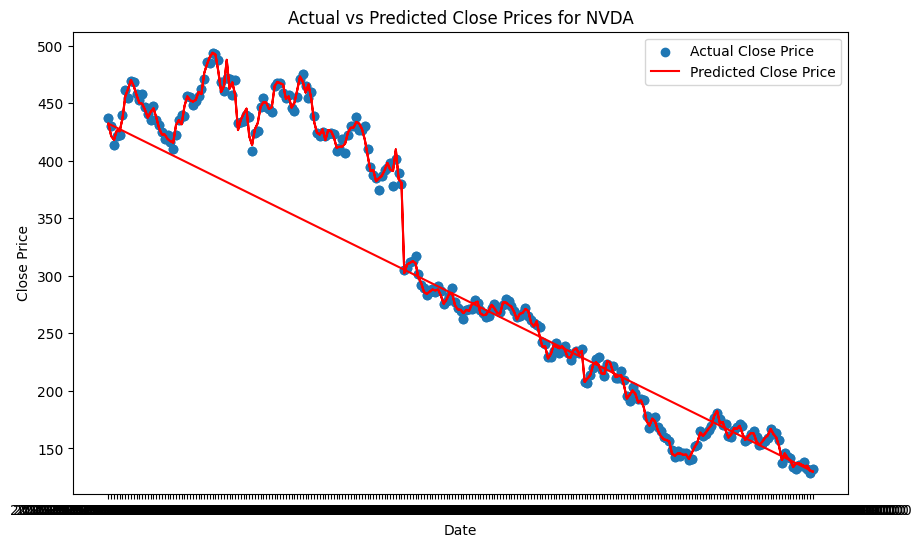

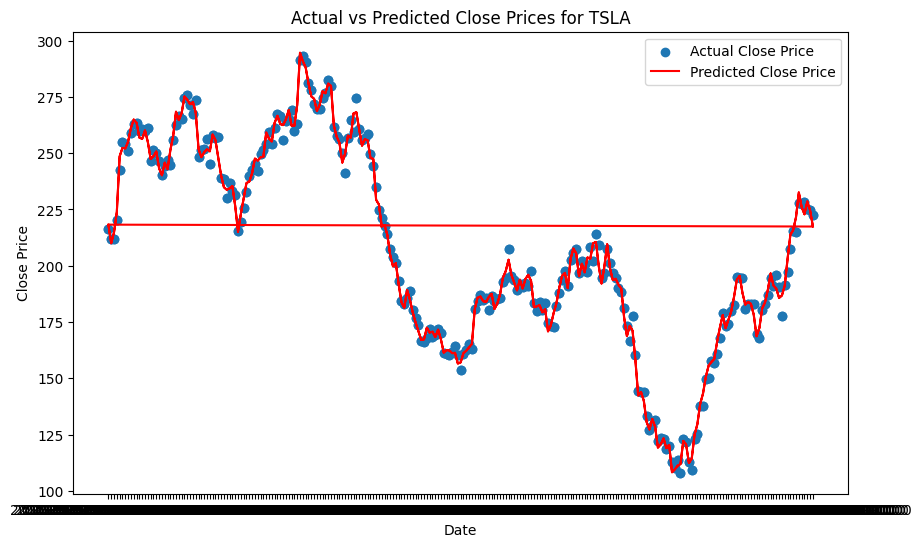

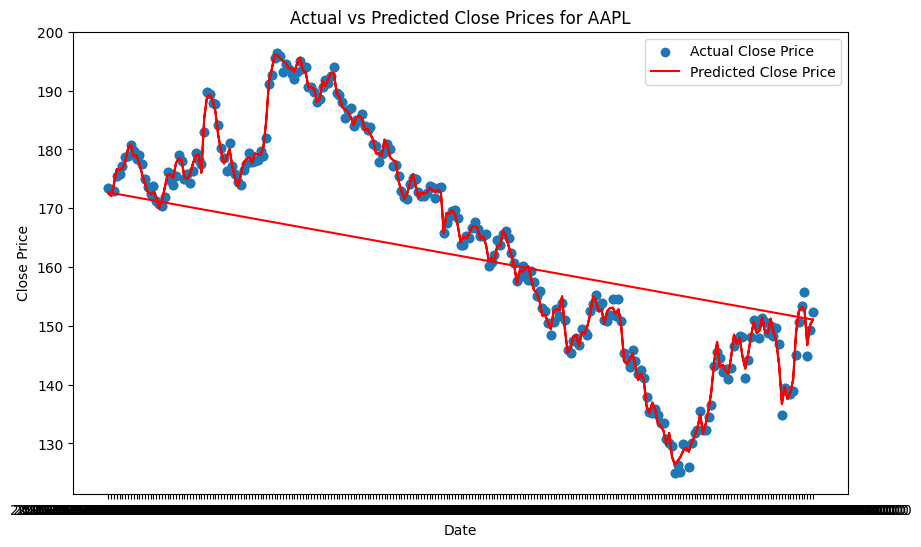

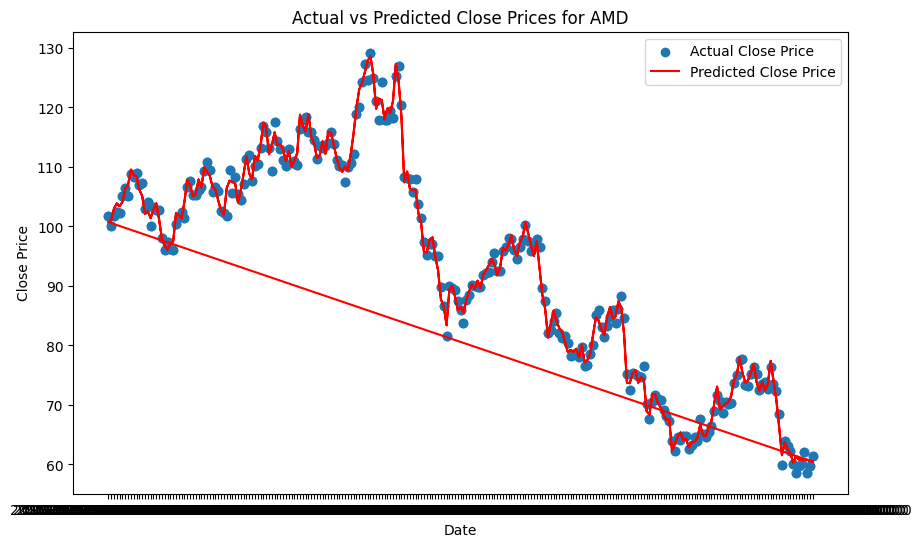

In [ ]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(stock_symbol):
    stock_data = df[df['Symbol'] == stock_symbol]
    X = stock_data.drop(['Date', 'Symbol', 'Close'], axis=1)
    y_actual = stock_data['Close']
    y_pred = model.predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(stock_data['Date'], y_actual, label='Actual Close Price')
    plt.plot(stock_data['Date'], y_pred, color='red', label='Predicted Close Price')
    plt.title(f'Actual vs Predicted Close Prices for {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# Plot for each stock
for symbol in stock_symbols:
    plot_actual_vs_predicted(symbol)


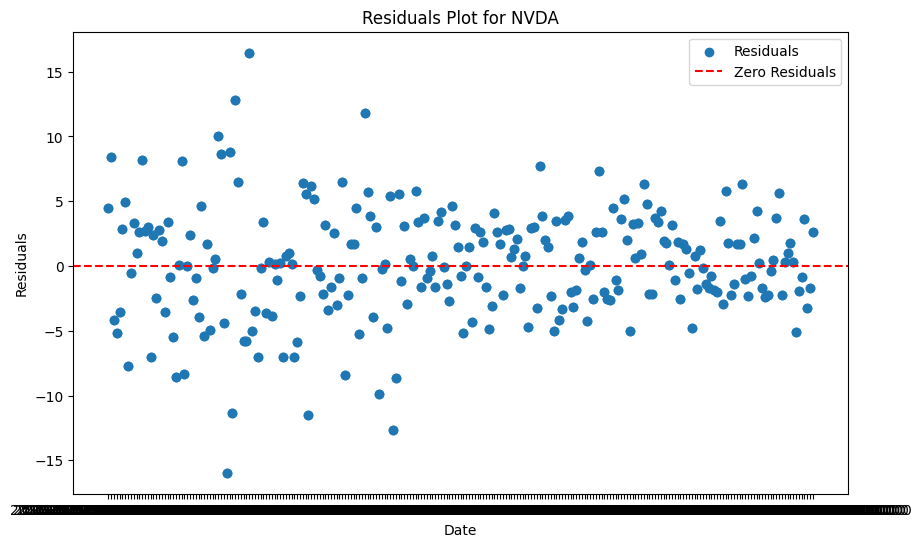

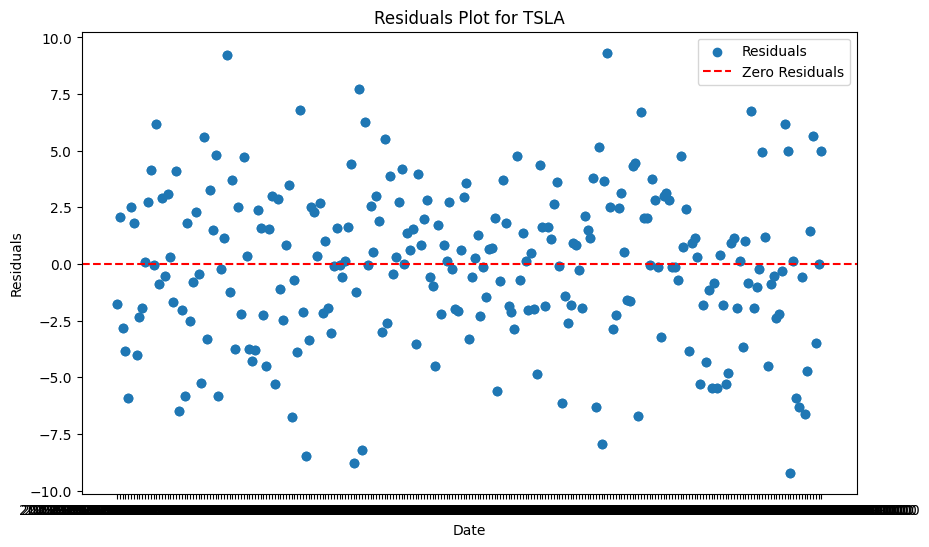

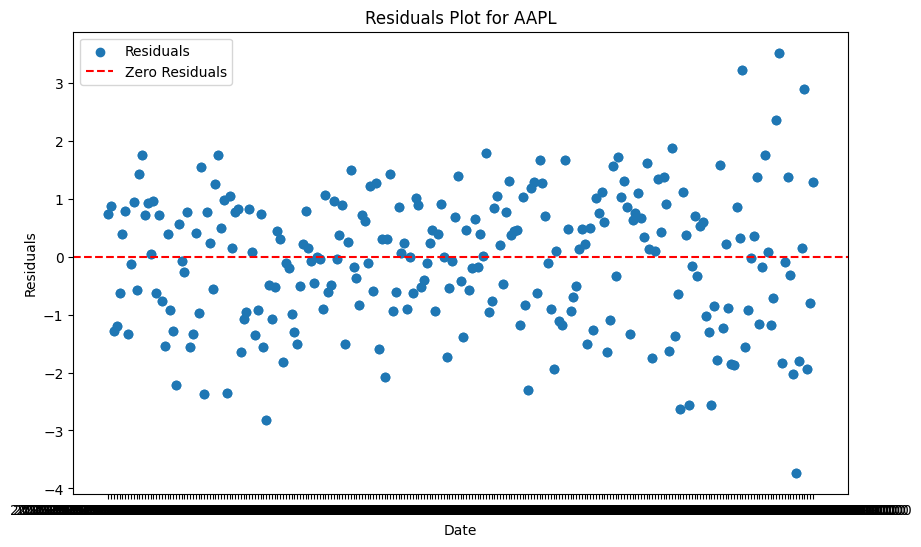

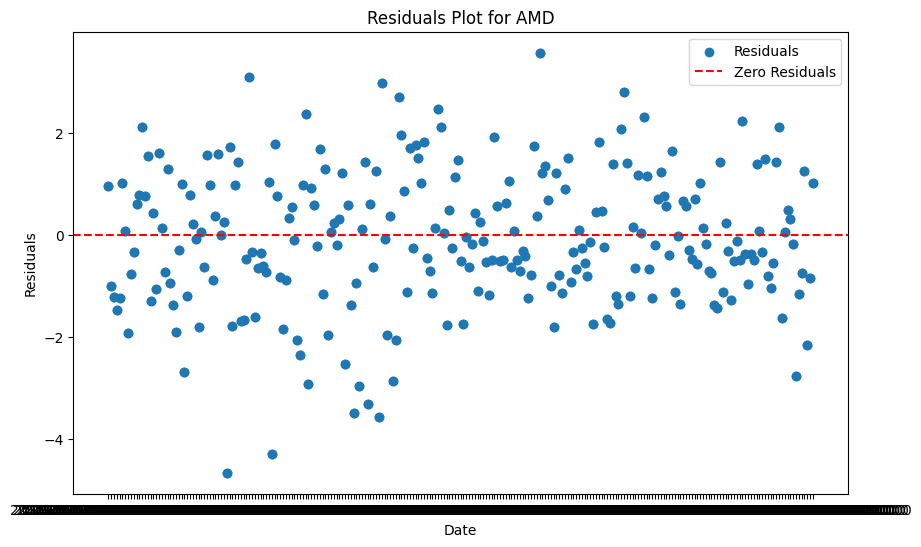

In [ ]:
def plot_residuals(stock_symbol):
    stock_data = df[df['Symbol'] == stock_symbol]
    X = stock_data.drop(['Date', 'Symbol', 'Close'], axis=1)
    y_actual = stock_data['Close']
    y_pred = model.predict(X)

    residuals = y_actual - y_pred

    plt.figure(figsize=(10, 6))
    plt.scatter(stock_data['Date'], residuals, label='Residuals')
    plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')
    plt.title(f'Residuals Plot for {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()

# Plot residuals for each stock
for symbol in stock_symbols:
    plot_residuals(symbol)
